In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('Admission_Predict.csv')

In [11]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
df.shape

(400, 9)

In [13]:
from sklearn.preprocessing import Binarizer

In [14]:
bi = Binarizer(threshold=0.75) # Values greater than the threshold become 1, and values less than or equal to the threshold become 0.
df["Chance of Admit "] = bi.fit_transform(df[['Chance of Admit ']])

In [15]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [16]:
x = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = df['Chance of Admit ']
y = y.astype('int') # For Zero and One and output

<Axes: xlabel='Chance of Admit ', ylabel='count'>

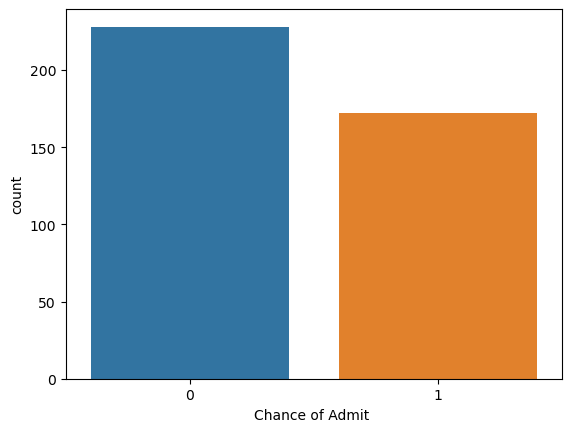

In [17]:
sns.countplot(x=y)

In [18]:
y.value_counts()

Chance of Admit 
0    228
1    172
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1) 

In [25]:
print(f"Size of splitted data")
print(f"x train dataset = {x_train.shape}")
print(f"x test dataset = {x_test.shape}")
print(f"y train dataset = {y_train.shape}")
print(f"y test dataset = {y_test.shape}")

Size of splitted data
x train dataset = (300, 7)
x test dataset = (100, 7)
y train dataset = (300,)
y test dataset = (100,)


In [26]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [27]:
model_dt = DecisionTreeRegressor(random_state=1)
model_rf = RandomForestRegressor(random_state=1)
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [28]:
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [29]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [30]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [32]:
y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_lr = model_lr.predict(x_test)

In [33]:
y_pred_rf.shape

(100,)

In [35]:
y_pred_rf = y_pred_rf.reshape(100, 1)

In [36]:
y_pred_rf.shape

(100, 1)

In [37]:
y_pred_rf = bi.fit_transform(y_pred_rf)

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score 
from sklearn.metrics import classification_report

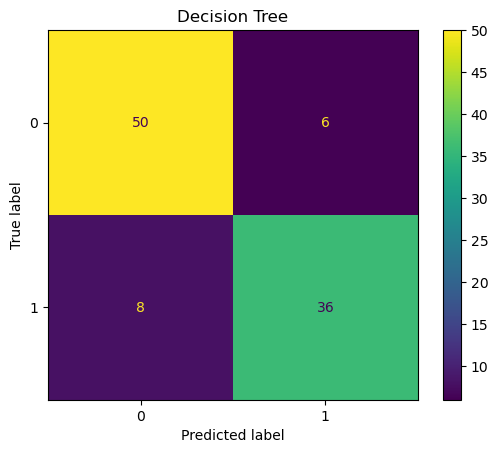

 Accuracy is 0.86
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.86      0.82      0.84        44

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [39]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt) 
plt.title('Decision Tree')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}") 
print(classification_report(y_test,y_pred_dt))

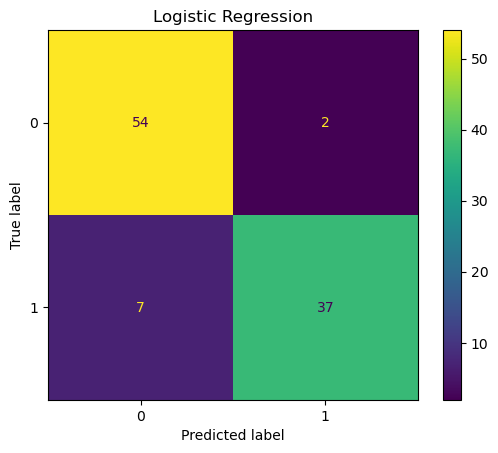

 Accuracy is 0.91
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        56
           1       0.95      0.84      0.89        44

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.91      0.91      0.91       100



In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr) 
plt.title('Logistic Regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}") 
print(classification_report(y_test,y_pred_lr))

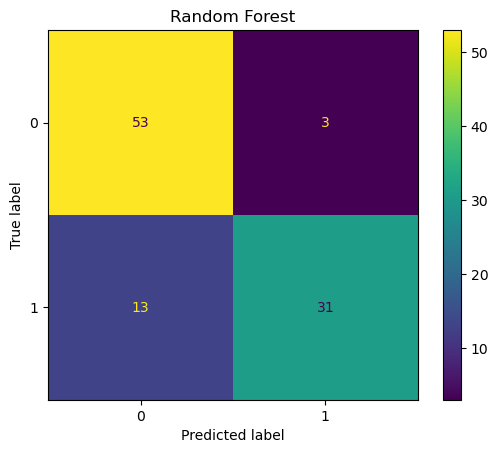

 Accuracy is 0.84
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        56
           1       0.91      0.70      0.79        44

    accuracy                           0.84       100
   macro avg       0.86      0.83      0.83       100
weighted avg       0.85      0.84      0.84       100



In [42]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf) 
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}") 
print(classification_report(y_test,y_pred_rf))